In [1]:
import jsonlines
import json
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def clean_text(text):
    text = text.replace(u'\xa0', u' ')
    text = re.sub(r' +', ' ', text)
    text = re.sub(r'\n +', '\n', text)
    text = re.sub(r'\r?\n(?!\r?\n)', ' ', text)
    text = re.sub(r'\n{2,}', '\n\n', text)
    text = re.sub(r'\n\n ?', '\n\n', text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r'- ?\n\n', '- ', text)
    text = re.sub(r'([,\)\w°])( ?\n\n ?)(\w)', '\g<1> \g<3>', text, flags=re.IGNORECASE)
    text = re.sub(r'[0-9]\n\n,', ',', text)
    text = re.sub(r'\n\n([.,]) ?\n\n', '\g<1>\n\n', text)
    text = re.sub(r'\n\n([.,–:]) ?', '\g<1> ', text)
    text = re.sub(r'\( ?\n\n', '(', text)
    text = re.sub(r'(\w)\n\n(\w)', '\g<1> \g<2>', text, flags=re.IGNORECASE)
    text = re.sub(r'\n\n(["§])\n\n', ' \g<1> ', text)
    text = text.strip('\n\n')

    return text

In [5]:
acordaos_2010 = []
with jsonlines.open('data/parsed_registers/2010.jsonl') as reader:
    for obj in reader:
        acordaos_2010.append({
            'ementa': clean_text(obj['ementa']),
            'inteiro_teor': clean_text(obj['inteiro_teor'])
        })

In [6]:
print(len(acordaos_2010))

157824


In [11]:
len_count = {}
for acordao in acordaos_2010:
    key = int(len(acordao['ementa']) / 100)
    if key in len_count.keys():
        len_count[key] = len_count[key] + 1
    else:
        len_count[key] = 1

In [25]:
to_df = { 'len': [l * 100 for l in len_count.keys()], 'count': list(len_count.values()) }
df = pd.DataFrame.from_dict(to_df)

In [15]:
# df = df.sort_values(by=['count'], ascending=False)
df.head()

,len,count
0,1,7112
1,32,260
2,11,3825
3,19,1278
4,14,2617


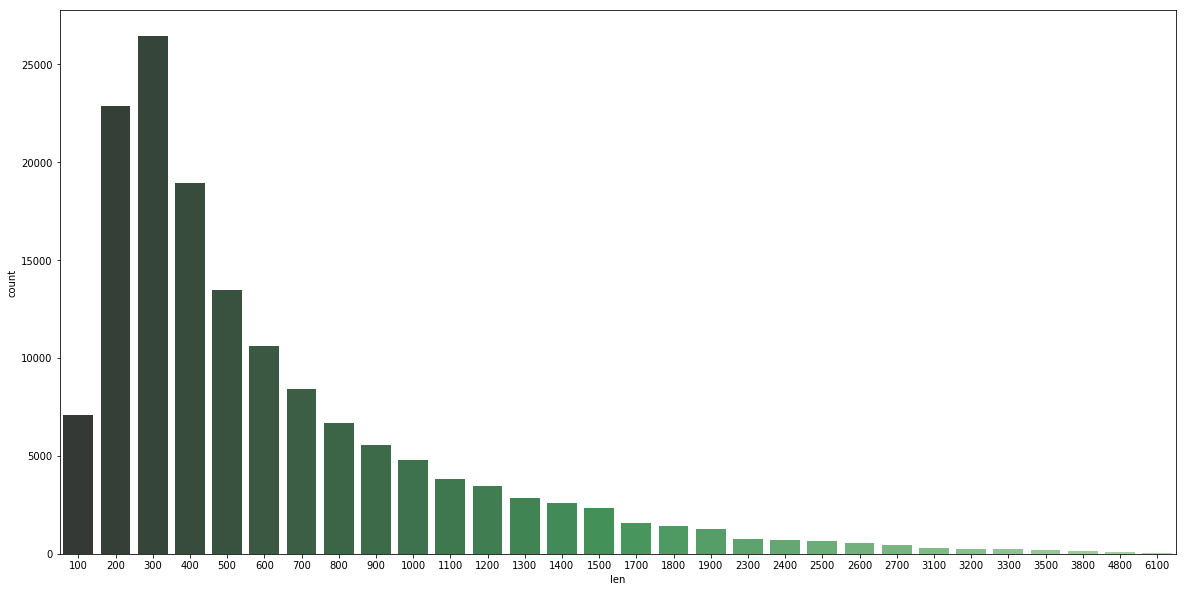

In [26]:
plt.figure(figsize=(20, 10))
sns.barplot(y='count', x='len', data=df[:30], palette='Greens_d')

In [31]:
def write_count_file(filename, data):
    with open(filename, 'w') as writer:
        write_data = json.dumps(data)
        writer.write(write_data)

In [32]:
write_count_file('2010_count.json', len_count)

In [3]:
acordaos_2011 = []
with jsonlines.open('data/parsed_registers/2011.jsonl') as reader:
    for obj in reader:
        acordaos_2011.append({
            'ementa': clean_text(obj['ementa']),
            'inteiro_teor': clean_text(obj['inteiro_teor'])
        })

In [4]:
print(len(acordaos_2011))

171255
